# **第六章：Gibbs采样器与后验近似**
Dreisteine, 2021.09.25

## **一、基于t检验比较两组独立样本均值**

两个学校学生考试成绩分数样本$x$：

In [12]:
y_1 <- c(1.0, 2.0, 1.1, 2.1, 0.5, 1.9)
y_2 <- c(0.5, 0.6, 7.0, 2.1, 3.3, 4.3, 2.0, 1.5, 2.1)

两组样本画图为：

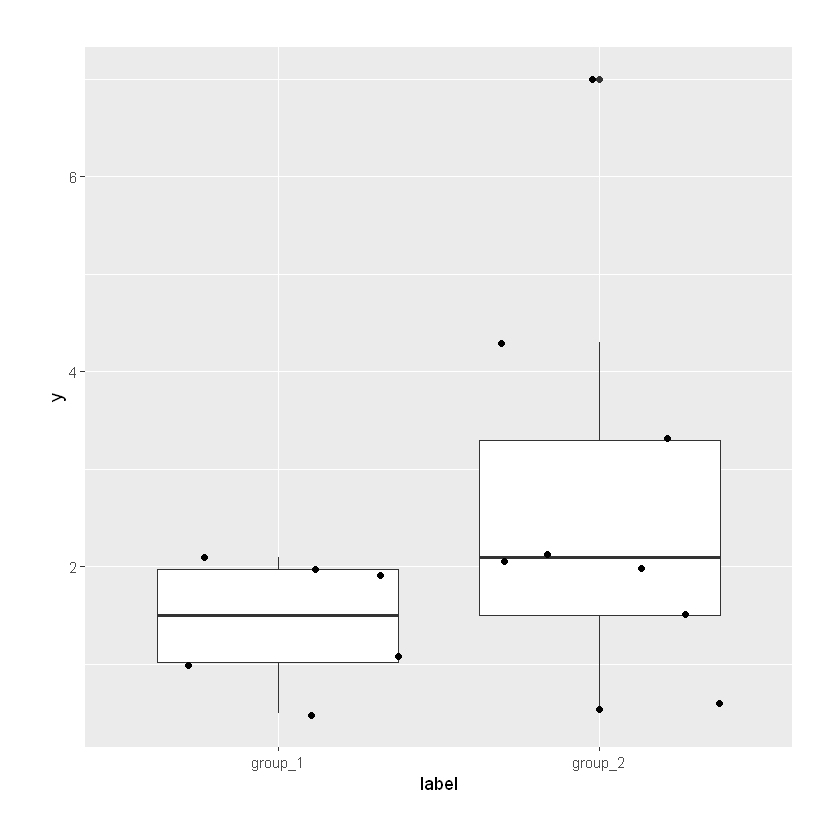

In [24]:
library(ggplot2)
df = data.frame(
  label = c(rep('group_1', times = length(y_1)), rep('group_2', times = length(y_2))), 
  y = c(y_1, y_2)
  )
ggplot(data = df, aes(x = label, y = y)) + geom_boxplot() + geom_jitter() + theme(plot.margin = unit(c(1, 1, 1, 1),"cm"))

使用t对两独立样本进行检验：

In [25]:
results <- t.test(y_1, y_2, alternative = "two.sided", var.equal = FALSE)
t_score <- results[1]$statistic
p_value <- results[3]$p.value

print(p_value)

[1] 0.140333


可见p值为0.14 > 0.05, 因此t检验认为**两组样本来自同一分布**。  
t检验认为:  
* 如果$p<0.05$:  
    $\theta_1 \neq \theta_2$, $\hat \theta_1 = \bar y_1$, $\hat \theta_2 = \bar y_2$;
* 如果$p>0.05$:  
    $\theta_1 = \theta_2$, $\hat \theta_1 = \hat \theta_2 = \frac{\sum_i y_{i,1} + \sum_j y_{j, 2}}{n_1 + n_2}$

对于参数$\theta_1$, 以上基于t检验的估计可以整理为:

$$
\hat \theta_1 = w \bar y_1 + (1 - w) \bar y_2
$$

其中$w=1$如果$p<0.05$, 否则$w=n_1 / (n_1 + n_2)$。可见权重$w$不是连续的。

## **二、基于贝叶斯的参数估计**

在没有观测到任何样本时，我们假设以上两组样本分布分别满足：

$$
Y_{i,1} = \mu + \delta + \epsilon_{i, 1} \\
Y_{j,2} = \mu - \delta + \epsilon_{j, 2} \\
\epsilon_{i, 1} \sim \text{i.i.d. normal}(0, \sigma^2) \\
\epsilon_{i, 2} \sim \text{i.i.d. normal}(0, \sigma^2) \\
$$

其中，

$$
\mu \sim \text{normal}(\mu_0, \gamma_0^2) \\
\delta \sim \text{normal}(\sigma_0, \tau_0^2) \\
\sigma^2 \sim \text{inverse-gamma}(\nu_0/2, \nu_0\sigma_0^2/2)
$$

三组参数的先验分布为：

$$
p(\mu, \delta, \sigma^2) = p(u) \times p(\delta) \times p(\sigma^2)
$$

现在已经观测到了两组样本$Y_1$和$Y_2$, 希望通过样本和先验分布求得各参数的后验分布。

$$
\{\mu|Y_1, Y_2, \delta, \sigma^2\} \sim 
$$